In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('C:\\\Python\\NLP\IS report\IS Periodic_all2.csv',  encoding="cp1252")

In [9]:
dataset.head(20)

,ReportId,Periodic ID,Periodic Title,Stage Title,Sql Code
0,1,18,Streetworks report,Stage 1,"SELECT DISTINCT\r ctr.centre_no,\r can.enrol..."
1,2,30,Sales orders by qualification type,Stage 1,"SELECT LEFT (CONVERT (varchar, DATEADD (m, 3,\..."
2,3,50,Entries by method,Report,"SELECT CAST (CONVERT (varchar, sos.transaction..."
3,4,57,CSkills Knowledge Test results (daily),Stage 1,"SELECT DISTINCT\r ctr.centre_no,\r can.enrol..."
4,5,65,Administration N/SVQ report,Registrations and certifications,"SELECT pos.qualification_programme_no,\r pos...."
5,6,65,Administration N/SVQ report,Unit accreditations,"SELECT lvl.level,\r mod.assessment_unit_no,\r..."
6,7,89,Move On report,Stage 1,"SELECT ctr.centre_no,\r ctr.centre_name,\r c..."
7,8,96,Exam entries (Group Policy) report,Stage 1,"SELECT LEFT (CONVERT (varchar, sos.assessment_..."
8,9,121,e-assessment results centre reports (monthly),Stage 1,SELECT ctr_centre_no centre_no\rFROM gola_exem...
9,10,123,Air Fares and Ticketing (Intraining) report,Stage 1,"SELECT ctr.centre_no,\r ctr.centre_name,\r C..."


In [10]:
dataset.shape
len(dataset)

433

In [11]:
import re
import nltk
corpus = []
for i in range(0, len(dataset)):
    #sql = re.sub('[^a-zA-Z._0-9]', ' ', dataset['Filter'][i])
    sql = re.sub('[^a-zA-Z._0-9]', ' ', dataset['Sql Code'][i])
    sql = sql.lower()
    corpus.append(sql)

In [12]:
corpus[0]

'select distinct   ctr.centre_no    can.enrolment_no    rtrim  can.first_name          can.middle_names     as first_name__xc040___xls___xc041    can.last_name    can.gender    cast  can.date_of_birth as datetime        as date_of_birth    isnull  smp.new_no  pos.qualification_programme_no     as universal_qualification_programme_no    cast  case when q.full_certification_ind   1 then    else    substring  isnull  smu.new_no  q.qualification_no   6  3     end as char  3             as universal_assessment_unit    cast  sos.transaction_date as datetime        as accreditation_date    q.qualification from programs_of_study pos    inner join sales_order_summary  sos    on   sos.program_of_study_id   pos.program_of_study_id    inner join qualifications q    on   q.qualification_id   sos.qualification_id    inner join candidates can    on   can.student_id   sos.student_id    inner join centres ctr    on   ctr.centre_id   sos.centre_id    and   ctr.sales_organisation_id   sos.sales_organisat

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
corpus_final = []
comma = ['.']
for i in range(0, len(dataset)):
    corpus1 = ''
    for word in corpus[i].split():
        if word.find(".") != -1:
            corpus1 = corpus1 + " " + word
    corpus_final.append(corpus1)

corpus_final[0]

' ctr.centre_no can.enrolment_no can.first_name can.middle_names can.last_name can.gender can.date_of_birth smp.new_no pos.qualification_programme_no q.full_certification_ind smu.new_no q.qualification_no sos.transaction_date q.qualification sos.program_of_study_id pos.program_of_study_id q.qualification_id sos.qualification_id can.student_id sos.student_id ctr.centre_id sos.centre_id ctr.sales_organisation_id sos.sales_organisation_id periodics.dbo.streetworksmappings smp.old_no pos.qualification_programme_no periodics.dbo.streetworksmappings smu.old_no q.qualification_no pos.qualification_group_no sos.transaction_type_id sos.transaction_date .t. sos.cancellation_date'

In [31]:
new_list = []
for i in range (0,len(dataset)):
    mylist = corpus_final[i].split()
    field_list = []
    field_list2 = []
    field_list = [(j,mylist.count(j)) for j in set(mylist) ]
    for f1, c1 in field_list:
        field_list2 = [dataset.iloc[i]["ReportId"],dataset.iloc[i]["Periodic ID"],dataset.iloc[i]["Periodic Title"],dataset.iloc[i]["Stage Title"],f1,c1]
        new_list.append(field_list2)
    
data = pd.DataFrame(new_list,columns=["ReportId","Periodic ID","Periodic Title","Stage Title","Field","Field Count"])
#for g in corpus_final[1].split():
#    print(g)

In [33]:
path = 'C:\\Python\\NLP\\IS report\\'
data.to_csv(path + 'field_name1.csv',sep=',')

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TreebankWordTokenizer

sql_stopwords = ['and','in','is','null','where','select','.t.','period','as',
                 '.t','by','on','or','from','not','else','when','end','not']
#cv = CountVectorizer(max_features = 1500,token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'")

cv = CountVectorizer(max_features = 3000,stop_words=sql_stopwords,tokenizer=TreebankWordTokenizer().tokenize)
X = cv.fit_transform(corpus_final).toarray()
y = dataset.iloc[:, 0].values

In [144]:
from collections import Counter
test = corpus_final[1].split()
c = Counter( test )

In [10]:
reports = dataset[['ReportId','Periodic ID','Periodic Title','Stage Title']]
reports.head()

,ReportId,Periodic ID,Periodic Title,Stage Title
0,1,18,Streetworks report,Stage 1
1,2,30,Sales orders by qualification type,Stage 1
2,3,50,Entries by method,Report
3,4,57,CSkills Knowledge Test results (daily),Stage 1
4,5,65,Administration N/SVQ report,Registrations and certifications


In [11]:
len(cv.vocabulary_)

1012

In [12]:
cv.vocabulary_

{'sd.transaction_date': 814,
 'rq.certification_end_date': 764,
 'ecat.education_category': 349,
 'er.grade_id': 372,
 'sis.estimated_net_value': 831,
 'sap.dbo.programs_of_study': 794,
 'det2.student_id': 329,
 'tt.usage': 1000,
 'nod.module_id': 551,
 'r.centre_no': 688,
 'es.entitysection': 391,
 'sos.cohort_id': 894,
 'reno.student_id': 747,
 'es2.student_id': 411,
 'rel.created_at': 726,
 'mod.assessment_type_id': 518,
 'sos3.cancellation_date': 953,
 'em.grade_changed_date_time': 359,
 'sos.assessment_duration_time': 875,
 'sos3.grade_id': 954,
 'can.c': 134,
 'det.attendance_status_id': 301,
 'rqu.qan': 771,
 'sos.centre_id': 892,
 'qa.centre_id': 651,
 'del.email': 293,
 'soi.sales_order_item_id': 872,
 'i.table_owner': 472,
 'c.caselogsourceid': 84,
 'ctr.centre_postcode': 206,
 'bk.exclusion_flags': 69,
 'it.investigationtype': 492,
 'nod.booking_date': 547,
 '.dbo.programs_of_study': 14,
 'rd.attendance_status_id': 700,
 'es.student_id': 407,
 'sos.qualification_id': 909,
 '

In [13]:
type(cv.vocabulary_)

dict

In [27]:
df_fields = pd.DataFrame([[key,value] for key,value in cv.vocabulary_.items()],columns=["Name","Id"])
column_names = df_fields.sort(columns='Id')[['Name']].values[0:]
#column_names = df_fields.sort(columns='Id')[['Name']].values[0:]
#cv.vocabulary_.items()
#fields_lists = [[key,value] for key,value in cv.vocabulary_.items()]
#newList = [[each_list[i] for i in [0]] for each_list in fields_lists]
#newList

C:\Users\bryanh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [49]:
cn = column_names.tolist()
cn1 = []
for x in range(0,len(cn)):
    cn1.append(cn[x][0])   

In [29]:
print('X shape',X.shape)
print('X type',type(X))

X shape (356, 1012)
X type <class 'numpy.ndarray'>


In [52]:
matrix = pd.DataFrame(X)
matrix.columns = cn1
matrix.head()

,.,.assessment_type,.assessment_type_id,.assessment_unit,.assessment_unit_no,.centres,.dbo.c,.dbo.centres,.dbo.disciplines,.dbo.evolve_results,...,u.uan,u.unit,u.unit_credit_value,u.usage,u.usage_id,um.material,um.old_material,um.sap_material_no,ut.unit_type,ut.unit_type_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data = reports.join(matrix)

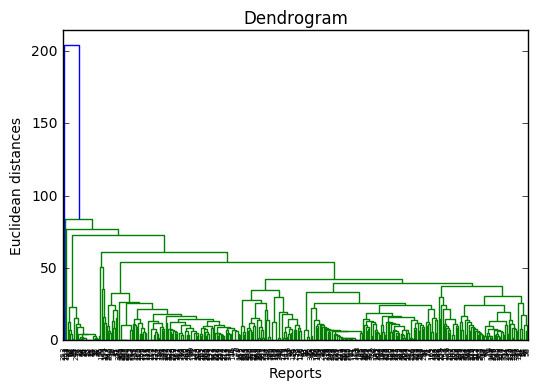

In [53]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Reports')
plt.ylabel('Euclidean distances')
plt.figure(figsize=(50,100))
plt.show()

In [54]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 70, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [55]:
y_hc

array([38, 44,  1, 38, 32, 53, 26, 26,  8,  5, 43, 43,  6, 16, 32, 38, 38,
       52, 61, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 52, 23, 23, 23,  8,
       16, 37, 37, 49,  8, 66,  6, 32, 53, 23,  8,  8,  5, 38, 23, 23, 39,
       25, 65,  7,  8, 48, 22, 22, 22, 22,  8,  8, 32, 53, 23,  2,  5,  0,
        0,  0, 52,  3,  3,  3,  3, 25, 32, 41,  8,  8, 18, 20, 20,  0, 32,
       53,  1, 36, 54, 21, 27, 27, 27, 27, 27, 27, 57, 57,  7,  5, 28, 46,
        7,  8,  4, 14, 14, 14, 32,  5,  5, 28, 46,  7,  8, 33, 52, 38, 12,
       53,  4,  8,  4,  0,  7, 33, 52,  4,  8,  4,  4, 12,  7,  5, 58, 55,
        8, 38, 14, 38,  5,  5, 53, 53, 38,  1, 36, 54,  8, 53, 47, 51, 20,
       25, 26, 31, 12,  9, 34, 34, 34,  1, 31, 12, 15, 31,  4,  5, 60, 46,
        7,  8, 31, 31, 52, 12, 38,  7,  8, 18,  8,  5, 42,  5,  4,  8, 50,
        6,  6,  4, 10, 10,  7,  8,  7, 68, 26,  4, 21, 21, 31, 31, 31, 25,
       30, 12, 31, 26, 63,  4, 12, 38, 17, 24,  2, 38, 30, 30,  8,  8, 18,
       18, 42, 11, 17, 38

In [56]:
result_list = y_hc.tolist()
report_list = y.tolist()

In [57]:
df1 = pd.DataFrame({'Periodic ID': report_list,'Group': result_list})

In [58]:
df1.head()

,Group,Periodic ID
0,38,1
1,44,2
2,1,3
3,38,4
4,32,5


In [59]:
df2 = dataset[['Periodic ID','Periodic Title']]
df2.head()

,Periodic ID,Periodic Title
0,18,Streetworks report
1,30,Sales orders by qualification type
2,50,Entries by method
3,57,CSkills Knowledge Test results (daily)
4,65,Administration N/SVQ report


In [60]:
result = df1.join(df2,rsuffix='r')

In [61]:
result.head()

,Group,Periodic ID,Periodic IDr,Periodic Title
0,38,1,18,Streetworks report
1,44,2,30,Sales orders by qualification type
2,1,3,50,Entries by method
3,38,4,57,CSkills Knowledge Test results (daily)
4,32,5,65,Administration N/SVQ report


In [66]:
path = 'C:\\Python\\NLP\\IS report\\'
result.to_csv(path + '70Group.csv',sep=',')

In [ ]:
df_fields.to_csv(path+'all_words.csv', sep=',')

In [ ]:
pd.DataFrame(X.transpose()).to_csv(path+'all_words2.csv', sep=',')

In [114]:
data.to_csv(path+'data.csv', sep=',')
data.transpose().to_csv(path+'data_transpose.csv', sep=',')

In [115]:
data.head()

,ReportId,Periodic ID,Periodic Title,Stage Title,.,.assessment_type,.assessment_type_id,.assessment_unit,.assessment_unit_no,.centres,...,u.uan,u.unit,u.unit_credit_value,u.usage,u.usage_id,um.material,um.old_material,um.sap_material_no,ut.unit_type,ut.unit_type_id
0,1,18,Streetworks report,Stage 1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,30,Sales orders by qualification type,Stage 1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,50,Entries by method,Report,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,57,CSkills Knowledge Test results (daily),Stage 1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,65,Administration N/SVQ report,Registrations and certifications,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
column_names2 = ['pos.program_of_study_id','pos.qualification_programme_no']
list2 = []
n,m = data.shape
for i in range (0,n):
    for j in cn1:
        if data.iloc[i][j] > 0:
            list1 = []
            list1 = [data.iloc[i]["ReportId"], data.iloc[i]["Periodic ID"], data.iloc[i]["Periodic Title"], data.iloc[i]["Stage Title"], j ,data.iloc[i][j]]
            list2.append(list1)
#data.iloc[1]["pos.program_of_study_id"]
#list1 = [data.iloc[1]["Periodic ID"],data.iloc[1]["Periodic Title"], data.iloc[1]["pos.program_of_study_id"]]

In [148]:
pd.DataFrame(list2).to_csv(path+'data_with_field.csv', sep=',')

In [149]:
pd.DataFrame(list2).head()

,0,1,2,3,4,5
0,1,18,Streetworks report,Stage 1,can.date_of_birth,1
1,1,18,Streetworks report,Stage 1,can.enrolment_no,1
2,1,18,Streetworks report,Stage 1,can.first_name,1
3,1,18,Streetworks report,Stage 1,can.gender,1
4,1,18,Streetworks report,Stage 1,can.last_name,1


1016